In [130]:
import pandas as pd
import seaborn as sns
import math
from scipy.stats import pearsonr, spearmanr

In [102]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<font size='6'>Эффект ожиданий (anchoring bias)<font>

In [165]:
data = pd.read_csv('Эффект ожиданий.csv').drop(columns=['Unnamed: 0.1','Unnamed: 0'])
data = data.rename(columns={'Сколько стоит 5 вещь?':'target_оценка'})
data['avg_cost_except_target'] = data.iloc[:, 4:8].sum(axis=1)/4 #для каждого человека посчитаем среднее из его оценок (в денежном эквиваленте) без контрольной вещи
data = data.drop(columns=rich_group.columns[4:8])

In [210]:
cheap_group = data[data['Номер контрольной группы'] == 'Дешёвые']
cheap_group = cheap_group[cheap_group['target_оценка'] < 70000] #только 1 человек оценил вещь так дорого, считаем аномалией
rich_group = data[data['Номер контрольной группы'] == 'Дорогие']
rich_group = rich_group[rich_group['target_оценка'] < 6000000] #только 3 человека оценили вещи так дорого, считаем аномалией

<font size='4'>Посмотрим на то, какую аудиторию опрашивали<font>

<Axes: xlabel='Ваш пол?', ylabel='Count'>

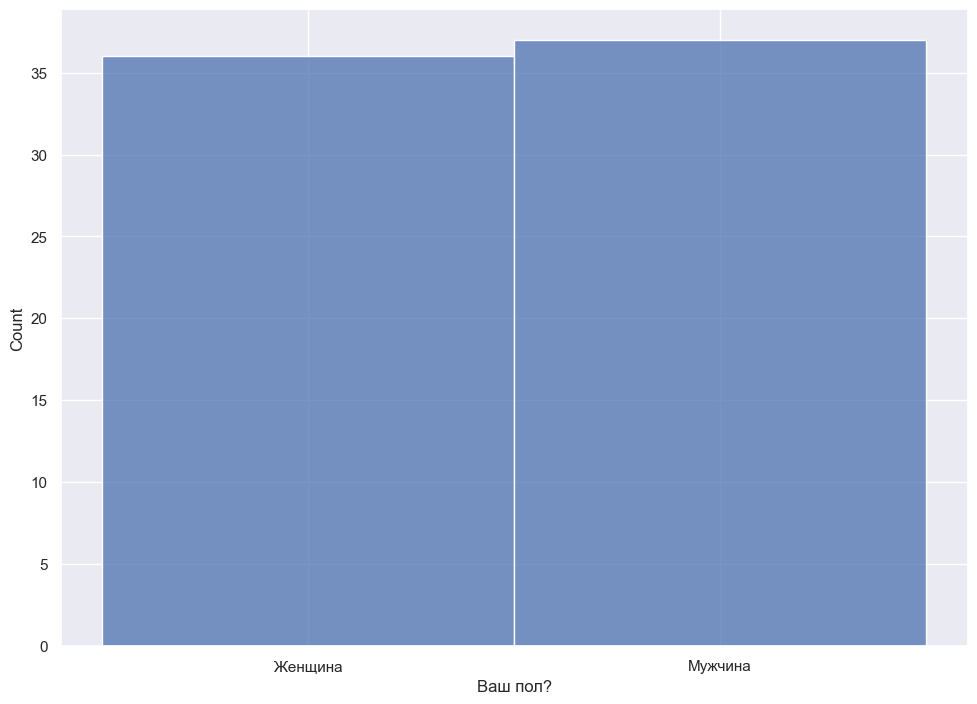

In [211]:
sns.histplot(data['Ваш пол?'])

<Axes: xlabel='Сколько лет?', ylabel='Count'>

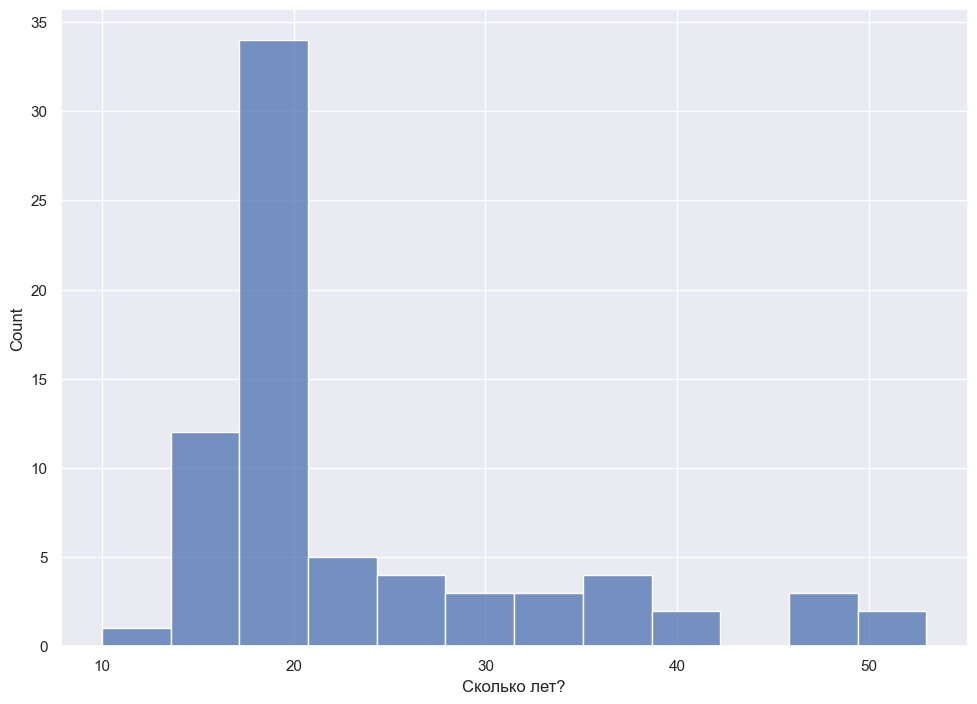

In [212]:
sns.histplot(data['Сколько лет?'])

<font size='4'>Ниже представлены графики распределения оценок контрольной вещи (в денежном эквиваленте) для дорогой и дешевой категории<font>

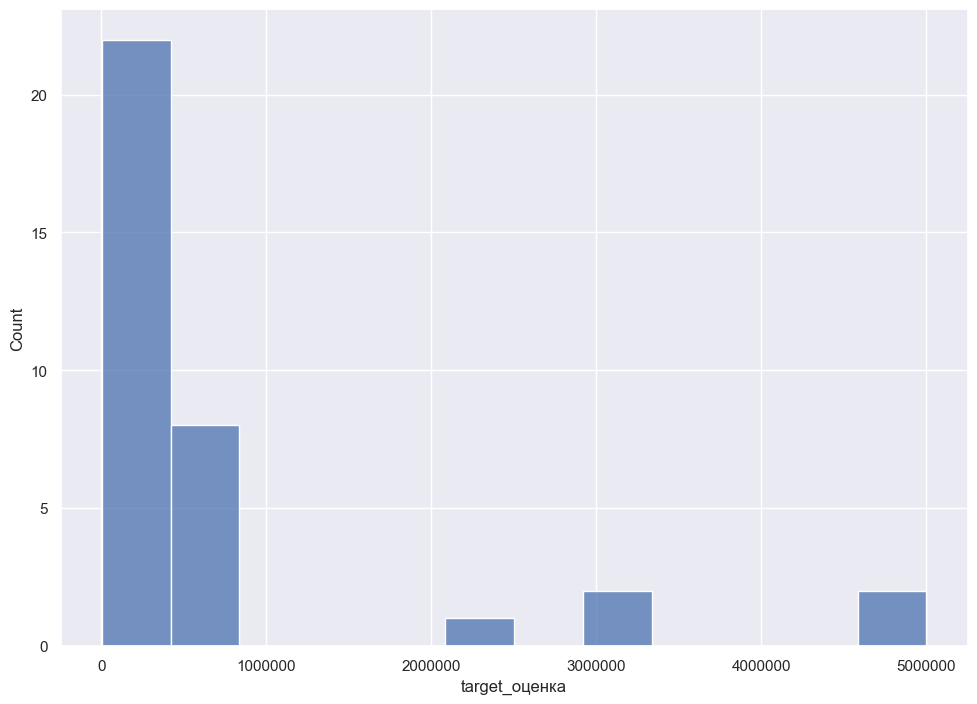

In [213]:
rich_cost = sns.histplot(rich_group,x='target_оценка')
rich_cost.ticklabel_format(style='plain', axis='x')

In [214]:
rich_group['target_оценка'].mean()

np.float64(792149.0)

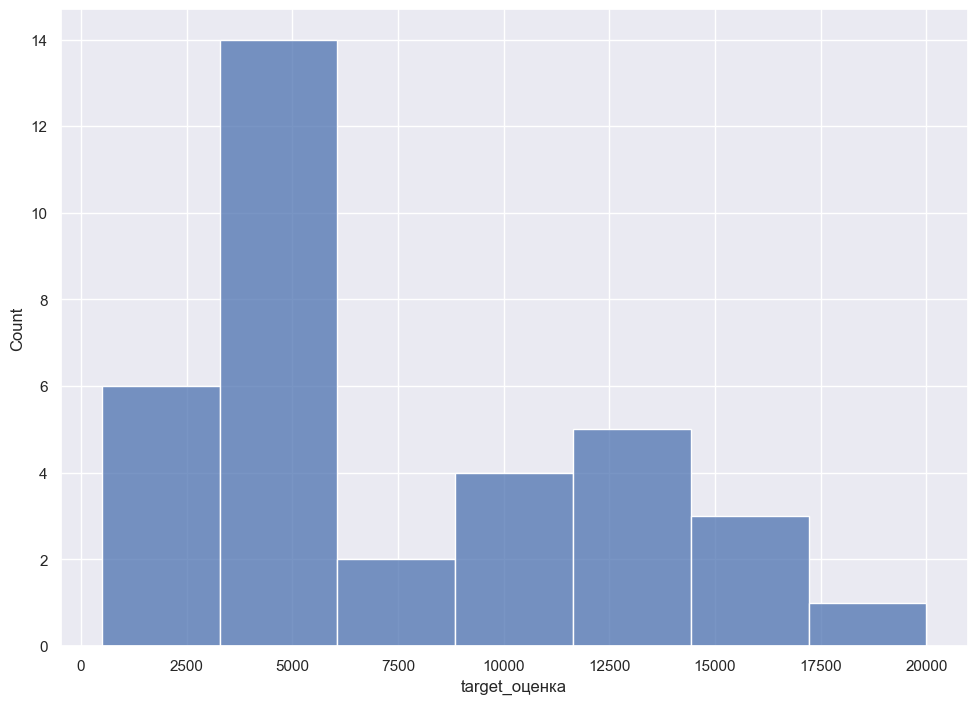

In [215]:
cheap_cost = sns.histplot(cheap_group,x='target_оценка')
cheap_cost.ticklabel_format(style='plain', axis='x')

In [216]:
cheap_group['target_оценка'].mean()

np.float64(7378.028571428571)

<font size='4'>Теперь посмотрим на отличия в распределениях средней оценки категории (avg_cost_except_target) и оценки контрольной вещи (target_оценка) по опрошенным для дорогой и дешевой категории<font>

<Axes: xlabel='avg_cost_except_target', ylabel='Count'>

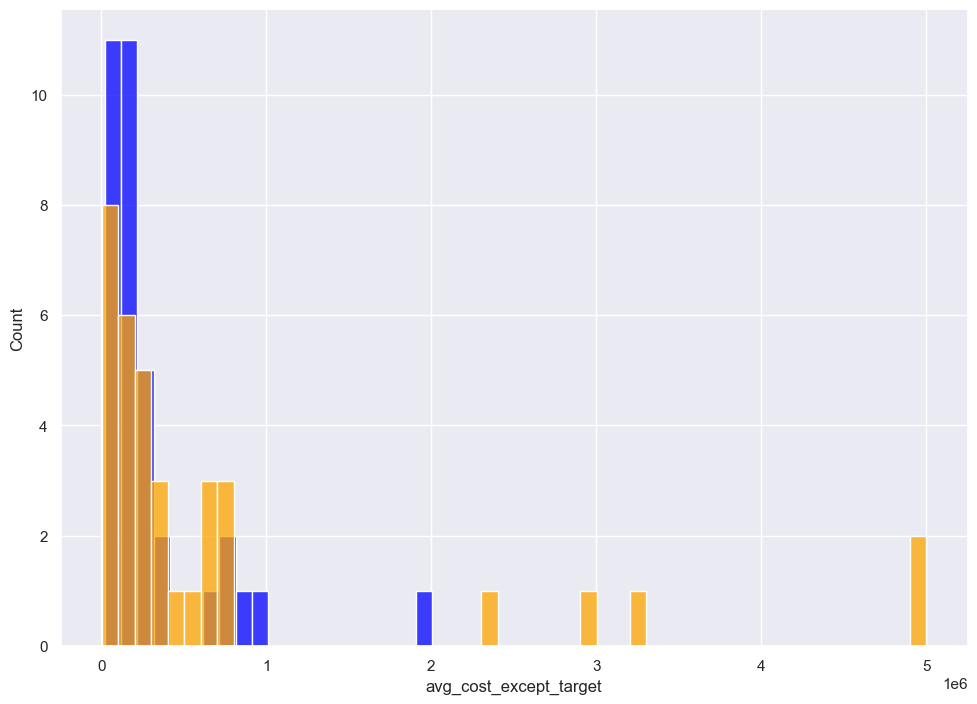

In [217]:
sns.histplot(rich_group,x='avg_cost_except_target',binwidth=100000,color='blue')
sns.histplot(rich_group,x='target_оценка',binwidth=100000,color='orange')

<Axes: xlabel='avg_cost_except_target', ylabel='Count'>

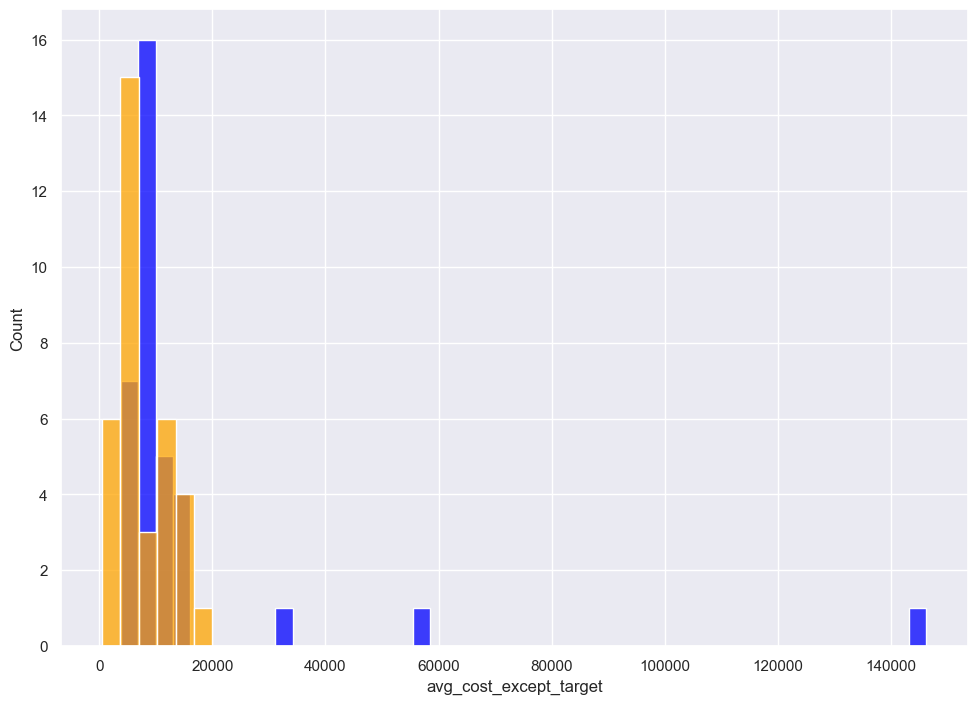

In [218]:
sns.histplot(cheap_group,x='avg_cost_except_target',binwidth=3000,color='blue')
sns.histplot(cheap_group,x='target_оценка',binwidth=3000,color='orange')

<font size='4'>Можно заметить, что в дешевой категории принято занижать цену контрольной вещи, даже по сравнению со средней ценой категории. А в дорогой категории,напротив, принято завышать цену контрольной вещи, даже по сравнению со средней ценой категории.<font>

<font size='5'>Узнаем,есть ли корелляция между средней ценой категории и оценкой контрольной вещи по опрошенным в разных группах<font>

In [223]:
corr_pear1, p_pear1 = pearsonr(rich_group['avg_cost_except_target'], rich_group['target_оценка'])
print(f"Pearson: r={corr_pear1:.3f}, p={p_pear1:.3f}")

Pearson: r=0.584, p=0.000


In [222]:
corr_pear2, p_pear2 = pearsonr(cheap_group['avg_cost_except_target'], cheap_group['target_оценка'])
print(f"Pearson: r={corr_pear2:.3f}, p={p_pear2:.3f}")

Pearson: r=0.313, p=0.068


<font size='5'>Получаем, что в дорогой категории намного сильнее зависит оценка контрольной вещи от эффекта ожиданий (статистически значимая корреляция).
Но в дешевой категории мы не можем отбросить нулевую гипотезу.
Полученная асимметрия согласуется с теорией: в низком ценовом сегменте потребители опираются на личный опыт и предпочтения (r=0.31, p=0.068),в премиум-сегменте доминирует эффект ожиданий от бренда/магазина (r=0.58, p<0.001).<font>